In [0]:
import pandas as pd
import numpy as np


In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [0]:
sc = SparkContext()
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

In [0]:
input_data="s3://nikhifinalprj6007/sample_geo.txt"

In [0]:
data = sc.textFile(input_data)
parts = data.map(lambda l: l.split("\t"))
# Each line is converted to a tuple.
final_data = parts.map(lambda p: (float(p[0]),float(p[1]),float(p[2]).strip()))


In [0]:
final_data.cache()

PythonRDD[9] at RDD at PythonRDD.scala:53

In [0]:
final_data.take(1)

[(37.77253945, -77.49954987, 1)]

In [0]:
type(final_data)

pyspark.rdd.PipelinedRDD

In [0]:
df = final_data.select("*").toPandas()

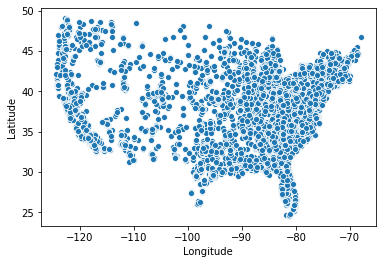

In [0]:
import seaborn as sns
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Longitude", y="Latitude", data=df,palette=sns.color_palette("muted"))